Models

In [ ]:
!pip install patsy

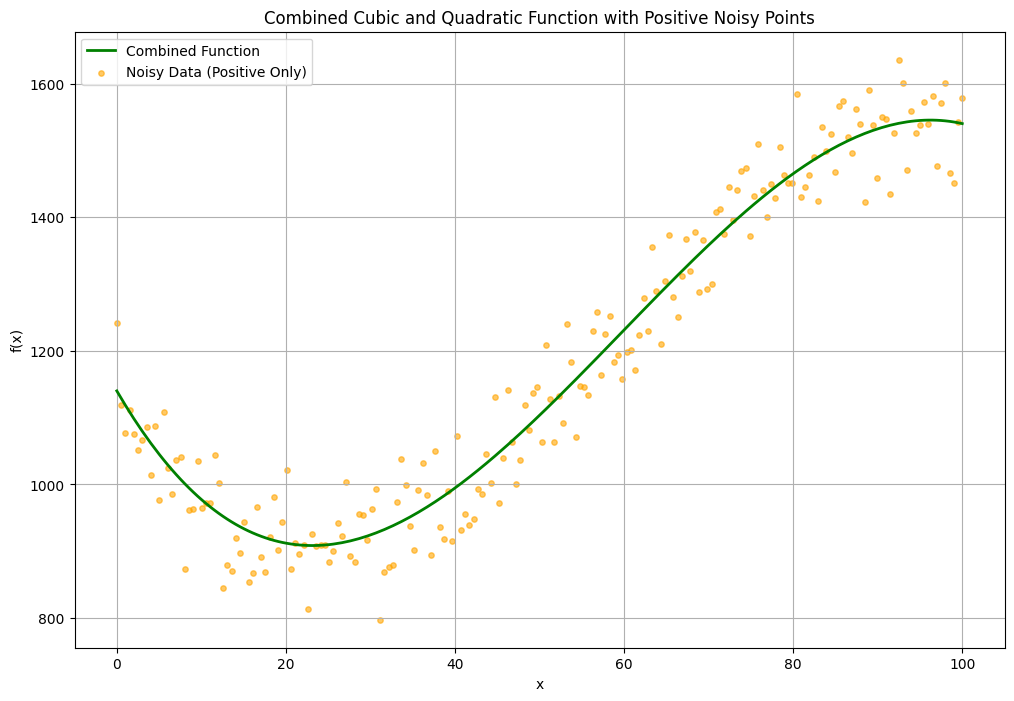

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve
from patsy import patsy

# Solve for cubic function coefficients
# Critical points at x=10 and x=50, and boundary conditions at x=0 and x=100
A_cubic = np.array([
    [3 * 20**2, 2 * 10, 1, 0],   # f'(10) = 0
    [3 * 66**2, 2 * 50, 1, 0],   # f'(50) = 0
    [0**3, 0**2, 0, 1],          # f(0) = 0
    [100**3, 100**2, 100, 1]     # f(100) = 1000 (arbitrary endpoint)
])
B_cubic = np.array([0, 0, 0, 1000])
coefficients_cubic = solve(A_cubic, B_cubic)
a_c, b_c, c_c, d_c = coefficients_cubic

def cubic_function(x):
    return a_c * x**3 + b_c * x**2 + c_c * x

# Define the quadratic function with maximum at x=70
a_q = -0.1  # Controls curvature
b_q = 500   # Peak value at x=70

def quadratic_function(x):
    return -a_q * (x - 80)**2 + b_q

# Define the combined function
def combined_function(x):
    return cubic_function(x) + quadratic_function(x)

# Generate data
x_range = np.linspace(0, 100, 200)
y_cubic = cubic_function(x_range)
y_quadratic = quadratic_function(x_range)
y_combined = combined_function(x_range)

# Add Gaussian noise to the combined function
noise = np.random.normal(0, 50, size=x_range.shape)
y_noisy = y_combined + noise

# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(x_range, y_combined, label="Combined Function", linewidth=2, color="green")
plt.scatter(x_range, y_noisy, s=15, color="orange", label="Noisy Data (Positive Only)", alpha=0.6)
plt.title("Combined Cubic and Quadratic Function with Positive Noisy Points")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

In [ ]:
polynomial_features= PolynomialFeatures(degree=3)
xp = polynomial_features.fit_transform(x_range.reshape(-1, 1))
m1 = sm.OLS(y_noisy, xp).fit()  # Python-style

# Print model summary to check coefficients
print(m1.summary())

# Predict using the fitted model
y_pred = m1.predict(xp)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     1374.
Date:                Sun, 17 Nov 2024   Prob (F-statistic):          2.66e-131
Time:                        20:57:29   Log-Likelihood:                -1069.7
No. Observations:                 200   AIC:                             2147.
Df Residuals:                     196   BIC:                             2161.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1138.0310     14.268     79.759      0.0

In [ ]:
lowess = sm.nonparametric.lowess
z = lowess(y_noisy, x_range,frac=0.33)

In [ ]:
x_loees = z[:, 0]
y_loees = z[:, 1]

In [ ]:
spline_basis = patsy.cr(x_range,df=6)
spline_regression = sm.OLS(y_noisy, spline_basis).fit()
y_spline = spline_regression.predict(spline_basis)

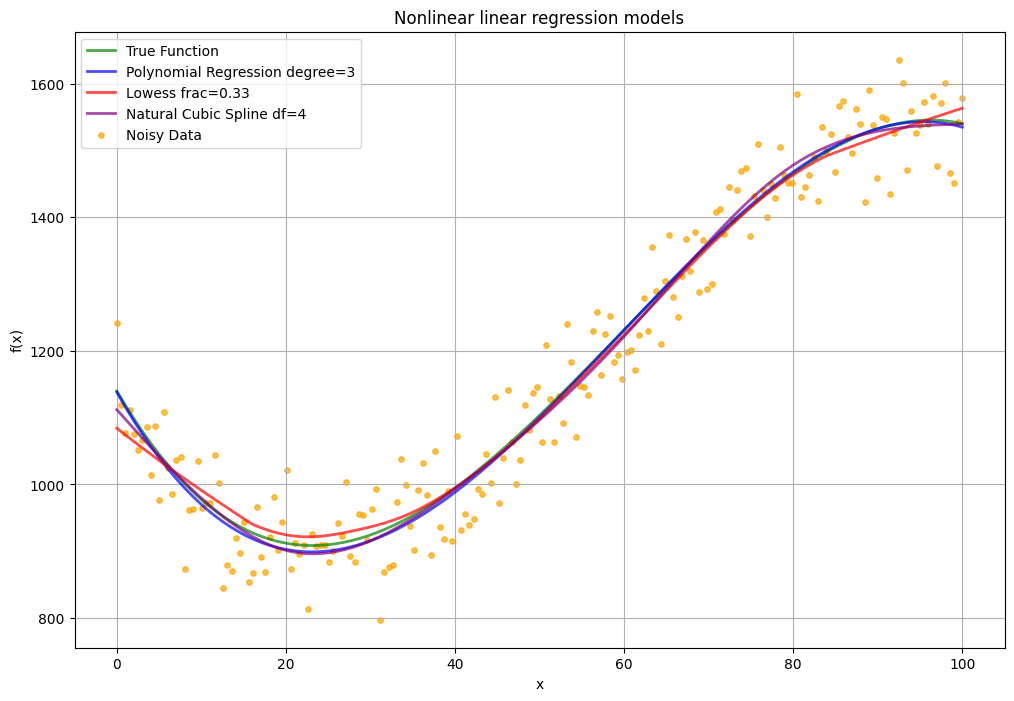

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(x_range, y_combined, label="True Function", linewidth=2, color="green",alpha=0.7)
plt.plot(x_range, y_pred, label="Polynomial Regression degree=3", linewidth=2, color="blue",alpha=0.7)
plt.plot(x_loees, y_loees, label="Lowess frac=0.33", linewidth=2, color="red",alpha=0.7)
plt.plot(x_range, y_spline, label="Natural Cubic Spline df=4", linewidth=2, color="purple",alpha=0.7)
plt.scatter(x_range, y_noisy, s=15, color="orange", label="Noisy Data", alpha=0.7)
plt.title("Nonlinear linear regression models")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()

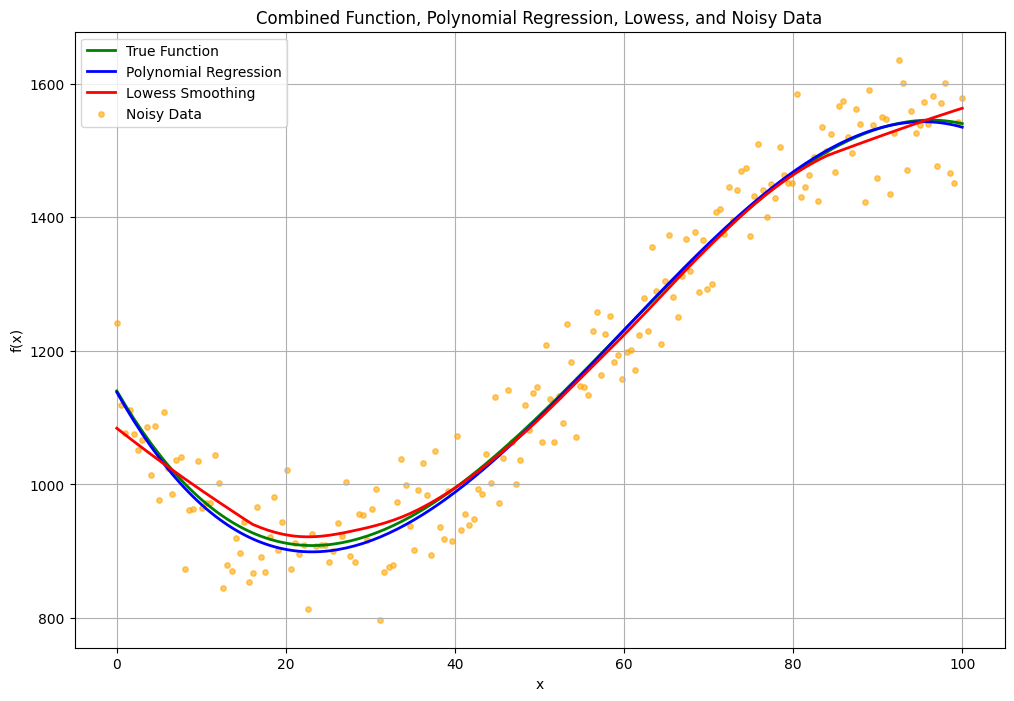

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(x_range, y_combined, label="True Function", linewidth=2, color="green")
plt.plot(x_range, y_pred, label="Polynomial Regression", linewidth=2, color="blue")
plt.plot(x_loees, y_loees, label="Lowess Smoothing", linewidth=2, color="red")
plt.scatter(x_range, y_noisy, s=15, color="orange", label="Noisy Data", alpha=0.6)
plt.title("Combined Function, Polynomial Regression, Lowess, and Noisy Data")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()